In [1]:
import numpy as np
import networkx as nx
from scipy.linalg import expm
from fastCTQW.Ctqw import Ctqw
from fastCTQW.State import State
from fastCTQW.Operator import Operator

from qwak.qwak import QWAK as QWAK
import qwak

In [ ]:
N = 1000
G = nx.gnp_random_graph(N,p = 0.01)

In [1]:
from fastCTQW.State import State

n = 4
markNodes = [0,3]
uniform_state = State.getUniformSuperposition(n)
loc_state = State.getLocalSuperposition(n, markNodes)

In [ ]:
from fastCTQW.Operator import Operator
N = 1000
A = np.fromfile("./A.bin", dtype = np.float64).reshape(N,N)
gamma = 1.0
time = 1.0
device = "cuda"
operator = Operator(A, gamma, time, device)

In [2]:
from fastCTQW.Ctqw import Ctqw
from fastCTQW.State import State
N = 4
gamma_lt = [0.1, 0.5, 1.0, 1.5, 2.0]
G_lt = [nx.gnp_random_graph(N,p = 0.5) for _ in range(5)]
Qwalker: Ctqw = Ctqw.from_num_nodes(N, dtype = np.complex64, device="cuda")

initStator = State.getUniformSuperposition(4)

for i in range(5):
    Qwalker.reset_networkx_graph(G_lt[i], initStator, gamma_lt[i])
    Qwalker.runWalk(time = 1.0)
    finalState = Qwalker.getFinalState()

0.1
0.5
1.0
1.5
2.0


In [ ]:
from fastCTQW.Plot import Plot

markNodes = [0, 5, 10]
fig1,ax1 = Plot.timeCurve(finalState, markNodes)
fig1.show()
fig2,ax2 = Plot.probDistribution(finalState)
fig2.show()


In [2]:
N = 50
G = nx.path_graph(N)
# initStator = State.getLocalSuperposition(N,[0,N-1])
# initStator = State.getSingleNodeState(N,0)
initStator = State.getUniformSuperposition(N)

Walker = Ctqw.from_networkx_graph(G, initStator, gamma = 1, dtype = np.float64)
Walker.runWalk(time = 10)
finalState = Walker.getFinalState()
probs = finalState.getProbabilities()**2

In [5]:
finalState.getProbabilities()

array([0.00064728, 0.0025007 , 0.00583892, 0.00984527, 0.0158803 ,
       0.02096694, 0.02814869, 0.03242573, 0.03554378, 0.03688784,
       0.03066855, 0.02649242, 0.01733857, 0.01163082, 0.01352894,
       0.01625813, 0.02763612, 0.03203263, 0.01949445, 0.01369669,
       0.02009631, 0.0228563 , 0.0202724 , 0.01924462, 0.02006763,
       0.02006763, 0.01924462, 0.0202724 , 0.0228563 , 0.02009631,
       0.01369669, 0.01949445, 0.03203263, 0.02763612, 0.01625813,
       0.01352894, 0.01163082, 0.01733857, 0.02649242, 0.03066855,
       0.03688784, 0.03554378, 0.03242573, 0.02814869, 0.02096694,
       0.0158803 , 0.00984527, 0.00583892, 0.0025007 , 0.00064728])

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter # 导入 ScalarFormatter


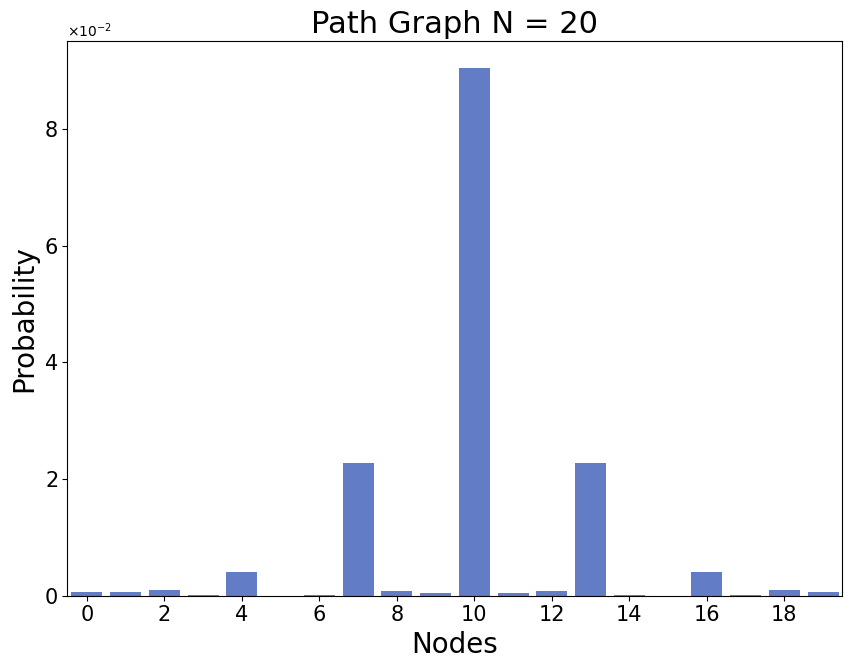

In [93]:
def probDistribution(stator: State):
    probs = stator.getProbabilities()**2
    N = len(probs)
    fig, ax = plt.subplots(figsize=(10,8*0.9))
    sns.barplot(x=np.arange(len(probs)), y=probs, color='#5275D6',ax = ax)
    ax.set_title(f"Path Graph N = {N}", fontsize = 22)
    ax.set_xlabel("Nodes", fontsize = 20)
    ax.set_ylabel("Probability",fontsize = 20)

    desired_x_ticks = np.arange(0, len(probs), len(probs)//10) # Indices for the ticks you want to show
    desired_x_labels = [str(i) for i in desired_x_ticks] # Corresponding labels

    ax.set_xticks(desired_x_ticks, desired_x_labels, fontsize = 15) # Set custom ticks and labels
    formatter = ScalarFormatter(useOffset=False, useMathText=True)
    # 启用科学计数法
    formatter.set_scientific(True)
    # 设置科学计数法的指数范围，scilimits=(0,0) 表示所有数字都使用科学计数法
    formatter.set_powerlimits((0, 0)) 
    
    # 将 Y 轴的主要刻度格式化器设置为我们创建的 ScalarFormatter
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis='y', labelsize=15) 
    return fig,ax
fig,ax = probDistribution(finalState)
fig.show()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8*0.9))
sns.barplot(x=np.arange(len(probs)), y=probs, color='#5275D6')
plt.title(f"Path Graph N = {N}", fontsize = 22)
plt.xlabel("Nodes", fontsize = 20)
plt.ylabel("Probability",fontsize = 20)

desired_x_ticks = np.arange(0, len(probs), 5) # Indices for the ticks you want to show
desired_x_labels = [str(i) for i in desired_x_ticks] # Corresponding labels
plt.xticks(desired_x_ticks, desired_x_labels, fontsize = 15) # Set custom ticks and labels
plt.yticks(fontsize = 15)

# plt.yticks(yticsks, ylabels)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.savefig("line_graph.pdf")
plt.show()

In [94]:
N = 20
G = nx.cycle_graph(N)
initStator = State.getSingleNodeState(N,0)
Walker = Ctqw.from_networkx_graph(G, initStator, gamma = 1, dtype = np.float64)
markNodes = [50, 200]
lt_state = []
for i in np.linspace(0, 2*np.pi, 100):
    Walker.runWalk(time = i)
    finalState = Walker.getFinalState()
    probs = np.abs(finalState.getState())**2
    lt_state.append(probs.tolist())
arr_state = np.array(lt_state)

In [107]:


line_styles = [
    (0, (1000, 1)),      # 实线 (非常长的实线段，几乎是连续的)
    (0, (1, 1)),         # 极细的点线 (类似于 :)
    (0, (5, 5, 5)),      # 更细的点线
    (0, (3, 5, 1, 5)),   # 点划线 (类似于 -.)
    (0, (6, 2, 2, 2)),   # 自定义：长虚线后跟小点
    (0, (5, 1)),         # 密集点划线 (短实线后跟短间隔)
    (0, (1, 5)),         # 稀疏点线 (短点后跟长间隔)
    (0, (10, 0)),        # 粗实线 (理论上就是纯实线，因为间隔为0)
    (0, (3, 1, 1, 1)),   # 虚线点线 (短虚线，点，短虚线，点...)
    (0, (2, 2, 5, 2))    # 自定义：短虚线，短间隔，长虚线，短间隔
]

colors = [
    'blue',
    'red',
    'green',
    'purple',
    'orange',
    'cyan',
    'magenta',
    'lime',     # 亮绿色
    'gold',     # 金色
    'teal'      # 青色/蓝绿色
]

def timeCurve(target_state: np.ndarray, times: list, markNodes: list):
    
    colors = ['blue', 'red', 'green']
    fig, ax = plt.subplots(figsize=(10,8*0.9))
    for i, node_index in enumerate(markNodes):
        ax.plot(times, target_state[:, i],
             label=f'Node {node_index}',
             color=colors[i],
             linestyle=line_styles[i],
             linewidth = 3) # You can adjust markersize as needed
    ax.set_title(f"Graph N = {N}", fontsize = 22)
    ax.set_xlabel("Time", fontsize = 20)
    ax.set_ylabel("Probability", fontsize = 20)
    ax.tick_params(axis='y', labelsize=15) 
    ax.tick_params(axis='x', labelsize=15)
    ax.legend(fontsize = 20)
    # fig.legend()
    return fig,ax

(<Figure size 1000x720 with 1 Axes>,
 <Axes: title={'center': 'Graph N = 20'}, xlabel='Time', ylabel='Probability'>)

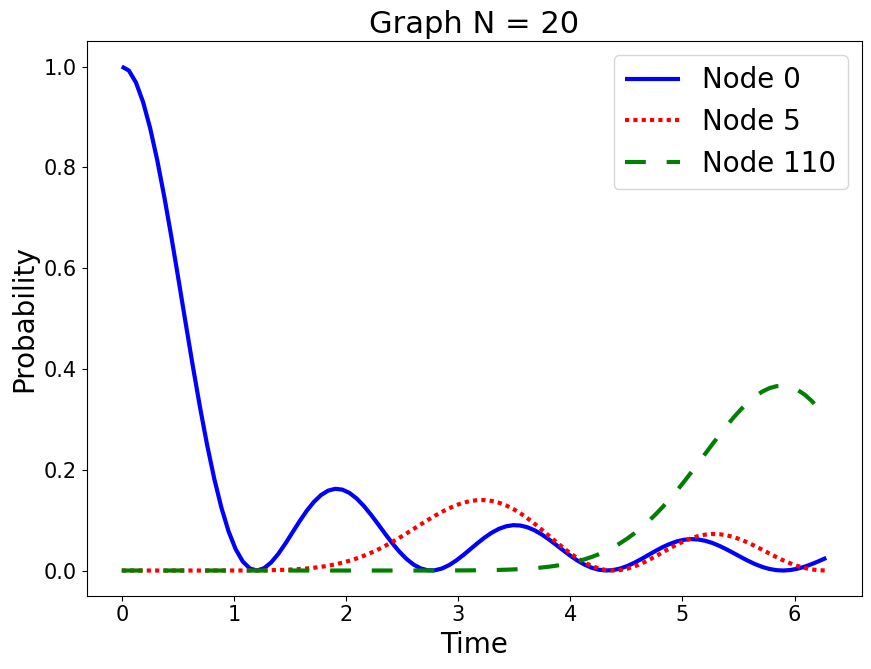

In [110]:
markNodes = [0, 5, 10]

target_state = arr_state[:,markNodes]

times = np.linspace(0, 2*np.pi, 100)
timeCurve(target_state, times, [0, 5, 10] )

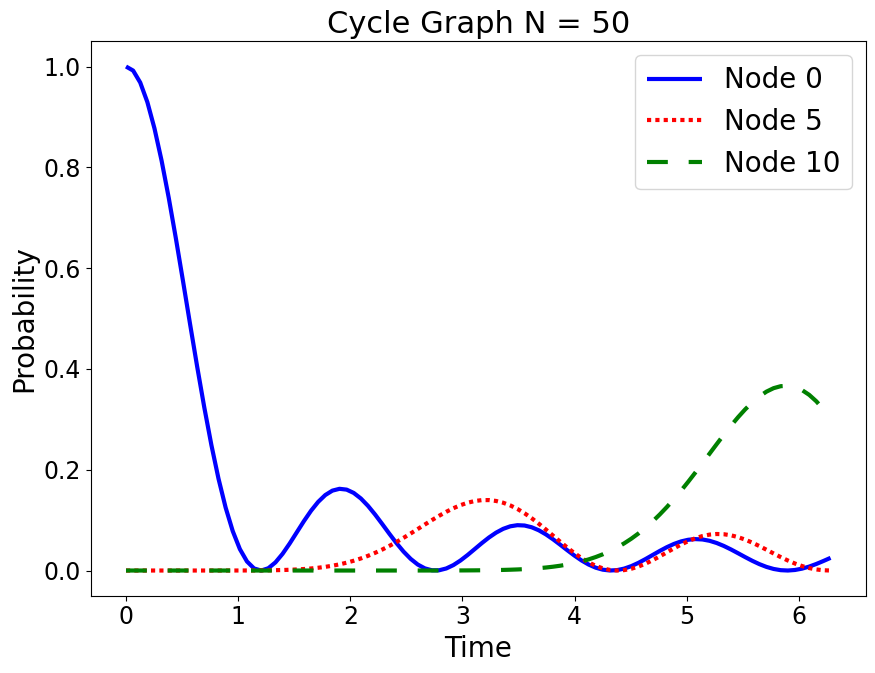

In [80]:
markNodes = [0, 5, 10]

target_state = arr_state[:,markNodes]
colors = ['blue', 'red', 'green']
line_styles = [
    (0, (1000, 1)) ,
    (0, (1, 1)),        # 极细的点线 (类似于 : )
    (0, ( 5, 5, 5)), # 更细的点线
    # (0, (3, 5, 1, 5)),  # 点划线 (类似于 -. )
    # (0, (6, 2, 2, 2)),  # 自定义：长虚线后跟小点
]
# plt.figure(figsize=(6, 4), dpi = 200)
plt.figure(figsize=(10,8*0.9))

for i, node_index in enumerate(markNodes):
    plt.plot(np.linspace(0, 2*np.pi, 100), target_state[:, i],
             label=f'Node {node_index}',
             color=colors[i],
             linestyle=line_styles[i],
             linewidth = 3) # You can adjust markersize as needed

plt.title(f"Cycle Graph N = {N}", fontsize = 22)
plt.xlabel("Time", fontsize = 20)
plt.xticks(fontsize = 17)
plt.ylabel("Probability", fontsize = 20)
plt.yticks(fontsize = 17)
plt.legend(fontsize = 20)
plt.savefig("cycle_graph.pdf")
plt.show()

In [4]:
1024*10

10240

In [3]:
initStator.getState()

array([0.31622776+0.j, 0.31622776+0.j, 0.31622776+0.j, 0.31622776+0.j,
       0.31622776+0.j, 0.31622776+0.j, 0.31622776+0.j, 0.31622776+0.j,
       0.31622776+0.j, 0.31622776+0.j], dtype=complex64)

In [14]:
10000 * 10000 * 8 * 8 / (1024**3)

5.9604644775390625

In [16]:
initNodes = [0]
qw = QWAK(G)
qw.runWalk(1, initNodes)
finalState = qw.getFinalState().getStateVec()

In [38]:
n = 4
initNodes = [0,1,2,3]
state = qwak.qwak.State(n, initNodes)
state.buildState()

In [39]:
state.getStateVec()

array([[0.5+0.j],
       [0.5+0.j],
       [0.5+0.j],
       [0.5+0.j]])

In [44]:
n = 4
state_vector = np.zeros(n, dtype=complex)
state_vector[0] = 1
state_vector[3] = 1
state_vector = state_vector / np.linalg.norm(state_vector)

state_vector

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])